In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns
import os
import numpy as np
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题



In [82]:
produce_panel_monthly = pd.read_csv('produce_panel_monthly.csv',encoding = 'utf-8-sig')


In [131]:
panel_front.drop(panel_front[panel_front['area'] == '全国平均'].index, inplace=True)
panel.drop(panel[panel['area'] == '西藏自治区'].index, inplace=True)
panel.drop('bean', axis = 1, inplace=True)

areaList = panel['area'].tolist()
# '上海','北京','重庆','天津','新疆'
areaList_short = []
for a in areaList:
    if a not in ['内蒙古自治区','黑龙江省']:
        a = a[0:2]
        areaList_short.append(a)
    else:
        a = a[0:3]
        areaList_short.append(a)
areaSet = set(areaList_short)
areaList2 = panel_front['area'].tolist()
areaSet2 = set(areaList2)

In [136]:
res = pd.DataFrame()
for area in areaSet:
    area_monthly = cover_to_monthly(panel[panel['area'].str[0:2] == area[0:2]])
    area_monthly = area_monthly[7:11]
    area_monthly['pigprice'] = area_monthly['pigprice'] + 1
    area_monthly['maizeprice'] = area_monthly['maizeprice'] / 1000
    
    area_front = cover_to_monthly(panel_front[panel_front['area'] == area])
    area_monthly_new = area_front.append(area_monthly, sort = False)
    area_monthly_new['area'] = [area] * area_monthly_new.shape[0]
    res = res.append(area_monthly_new, sort = False)


C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [ ]:
res.to_csv('monthly_price_panel_0217.csv', encoding = 'utf-8-sig')

In [45]:
panel_monthly = pd.read_csv('monthly_price_panel_0217.csv',encoding = 'utf-8-sig')

In [32]:
panel_pivot = panel_monthly.pivot(index='date', columns='area', values='pigprice')

In [16]:
panel_pivot.to_csv('monthly_panel_pivot.csv', encoding = 'utf-8-sig')

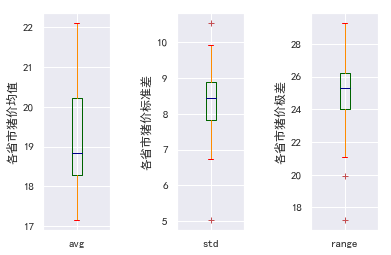

In [10]:
fig,axes = plt.subplots(1,3)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Red')
# boxes表示箱体，whisker表示触须线# medians表示中位数，caps表示最大与最小值界限 
boxdata.plot(kind='box',ax=axes,subplots=True, color=color,sym='r+')
# sym参数表示异常值标记的方式 
axes[0].set_ylabel('各省市猪价均值')
axes[1].set_ylabel('各省市猪价标准差')
axes[2].set_ylabel('各省市猪价极差')

fig.subplots_adjust(wspace=1,hspace=1)  
# 调整子图之间的间距
fig.savefig('箱图.png')    
# 将绘制的图片保存为p2.png


In [52]:
boxdata = pd.read_csv('boxplot.csv',encoding = 'utf-8-sig')

In [40]:
areaSet2 = set(produce_panel_monthly.columns.tolist()[1:31])
areaSet = set(panel_pivot.columns.tolist())

In [77]:
produce_panel_monthly[a]

0     3700.0
1     3800.0
2     3900.0
3     4000.0
4     4100.0
5     4226.8
6     4000.0
7     3800.0
8     3448.4
9     3200.0
10    3000.0
11    2700.0
12    2500.0
13    2000.0
14    1500.0
15    2000.0
16    2500.0
Name: 云南, dtype: float64

In [83]:
res = pd.DataFrame()
for a in areaSet2:
    price = panel_monthly[panel_monthly['area'] == a]
    price['上期生猪存栏'] = produce_panel_monthly[a].tolist()
    res = res.append(price, sort = False)
   

C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,pigprice,maizeprice,area,上期生猪存栏
272,2018-08-31,12.650000,2.000000,宁夏,76.860000
273,2018-09-30,12.650000,2.000000,宁夏,76.091400
274,2018-10-31,14.220000,1.960000,宁夏,75.330486
275,2018-11-30,13.950000,1.950000,宁夏,73.823876
276,2018-12-31,14.660000,1.980000,宁夏,71.609160
277,2019-01-31,13.740000,1.960000,宁夏,68.744794
278,2019-02-28,11.590000,1.930000,宁夏,65.307554
279,2019-03-31,13.360000,1.880000,宁夏,61.389101
280,2019-04-30,14.360000,1.880000,宁夏,57.091864
281,2019-05-31,15.270000,1.930000,宁夏,52.524515


In [84]:
res.to_csv('panel_monthly_0218.csv', encoding = 'utf-8-sig')

In [75]:
pd.concat([produce,price], axis = 1, join='outer',join_axes=None)

,云南,date,pigprice,maizeprice,area
0,3700.0,NaN,NaN,NaN,NaN
1,3800.0,NaN,NaN,NaN,NaN
2,3900.0,NaN,NaN,NaN,NaN
3,4000.0,NaN,NaN,NaN,NaN
4,4100.0,NaN,NaN,NaN,NaN
5,4226.8,NaN,NaN,NaN,NaN
6,4000.0,NaN,NaN,NaN,NaN
7,3800.0,NaN,NaN,NaN,NaN
8,3448.4,NaN,NaN,NaN,NaN
9,3200.0,NaN,NaN,NaN,NaN


In [48]:
def cover_date_to_dateIndex(c):
    c['date'] = pd.to_datetime(c['date'])
    c.set_index('date', inplace = True)
    return c

def cover_to_weekly(c):
    c['date'] = pd.to_datetime(c['date'])
    c.set_index('date', inplace = True)
    c = pd.DataFrame(c.groupby(pd.Grouper(freq='W-Sun')).mean())
    return c

def cover_to_monthly(c):
    c['date'] = pd.to_datetime(c['date'])
    c.set_index('date', inplace = True)
    c = pd.DataFrame(c.groupby(pd.Grouper(freq='M')).mean())
    return c

def getDate(name):
    number = list(filter(str.isdigit, name))
    date = ''
    for i in range(0,4):
        date += number[i]
    if len(number) == 5:
        date += '-0'
        date += number[4]
    else:  
        date += '-'
        date += number[4]
        date += number[5]
    return date  

def heatMap(corr):
    plt.figure(figsize = (20, 30))
    sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.5, annot = True, vmax = 1)
    plt.title('Correlation Heatmap')
    
    

In [101]:
path = 'tables/'
files = os.listdir(path)
res = pd.DataFrame()
for name in files:
    date = getDate(name)
    sheet = pd.read_excel('tables/' + name, sheet_name='Table 3')
    new = sheet[['省份','活猪','猪肉','白条鸡','玉米','豆粕','育肥猪饲料']]
    new['date'] = [date]*new.shape[0]
    res = res.append(new)
    
res = res.sort_values(['省份','date'])
res.to_csv('monthly_price_panel_0206.csv', encoding = 'utf-8-sig')

C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
bd_wb_monthly.to_csv('pbm_m.csv', encoding='utf-8-sig')

In [ ]:
pbm_m.to_csv('pbm_m.csv')

In [ ]:
ts_price_wb_m.to_csv('ts_price_wb_m.csv')

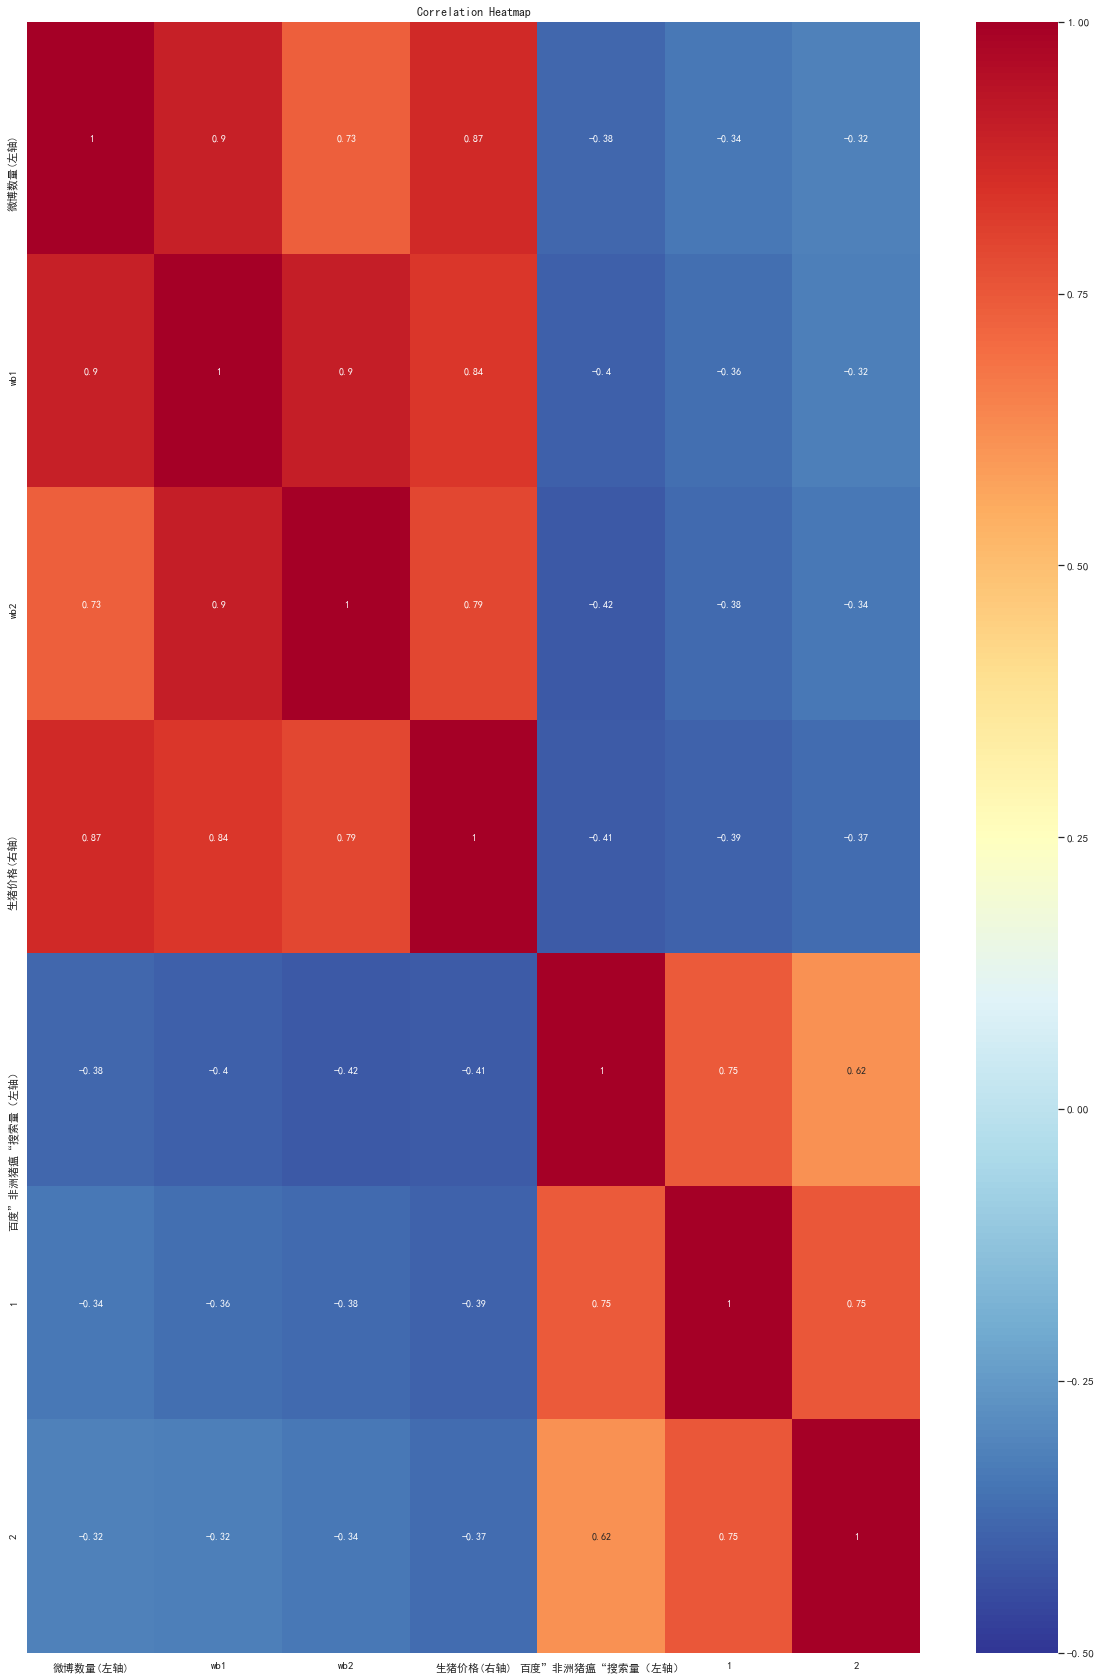

In [21]:
bd_wb_weekly_corr_ =bd_wb_weekly.corr(method = 'pearson', min_periods = 1)
heatMap(bd_wb_weekly_corr_)

In [30]:
l = [2.03] + correlation['上期玉米'].tolist()
correlation['ssmaize'] = l[0:len(l)-1]

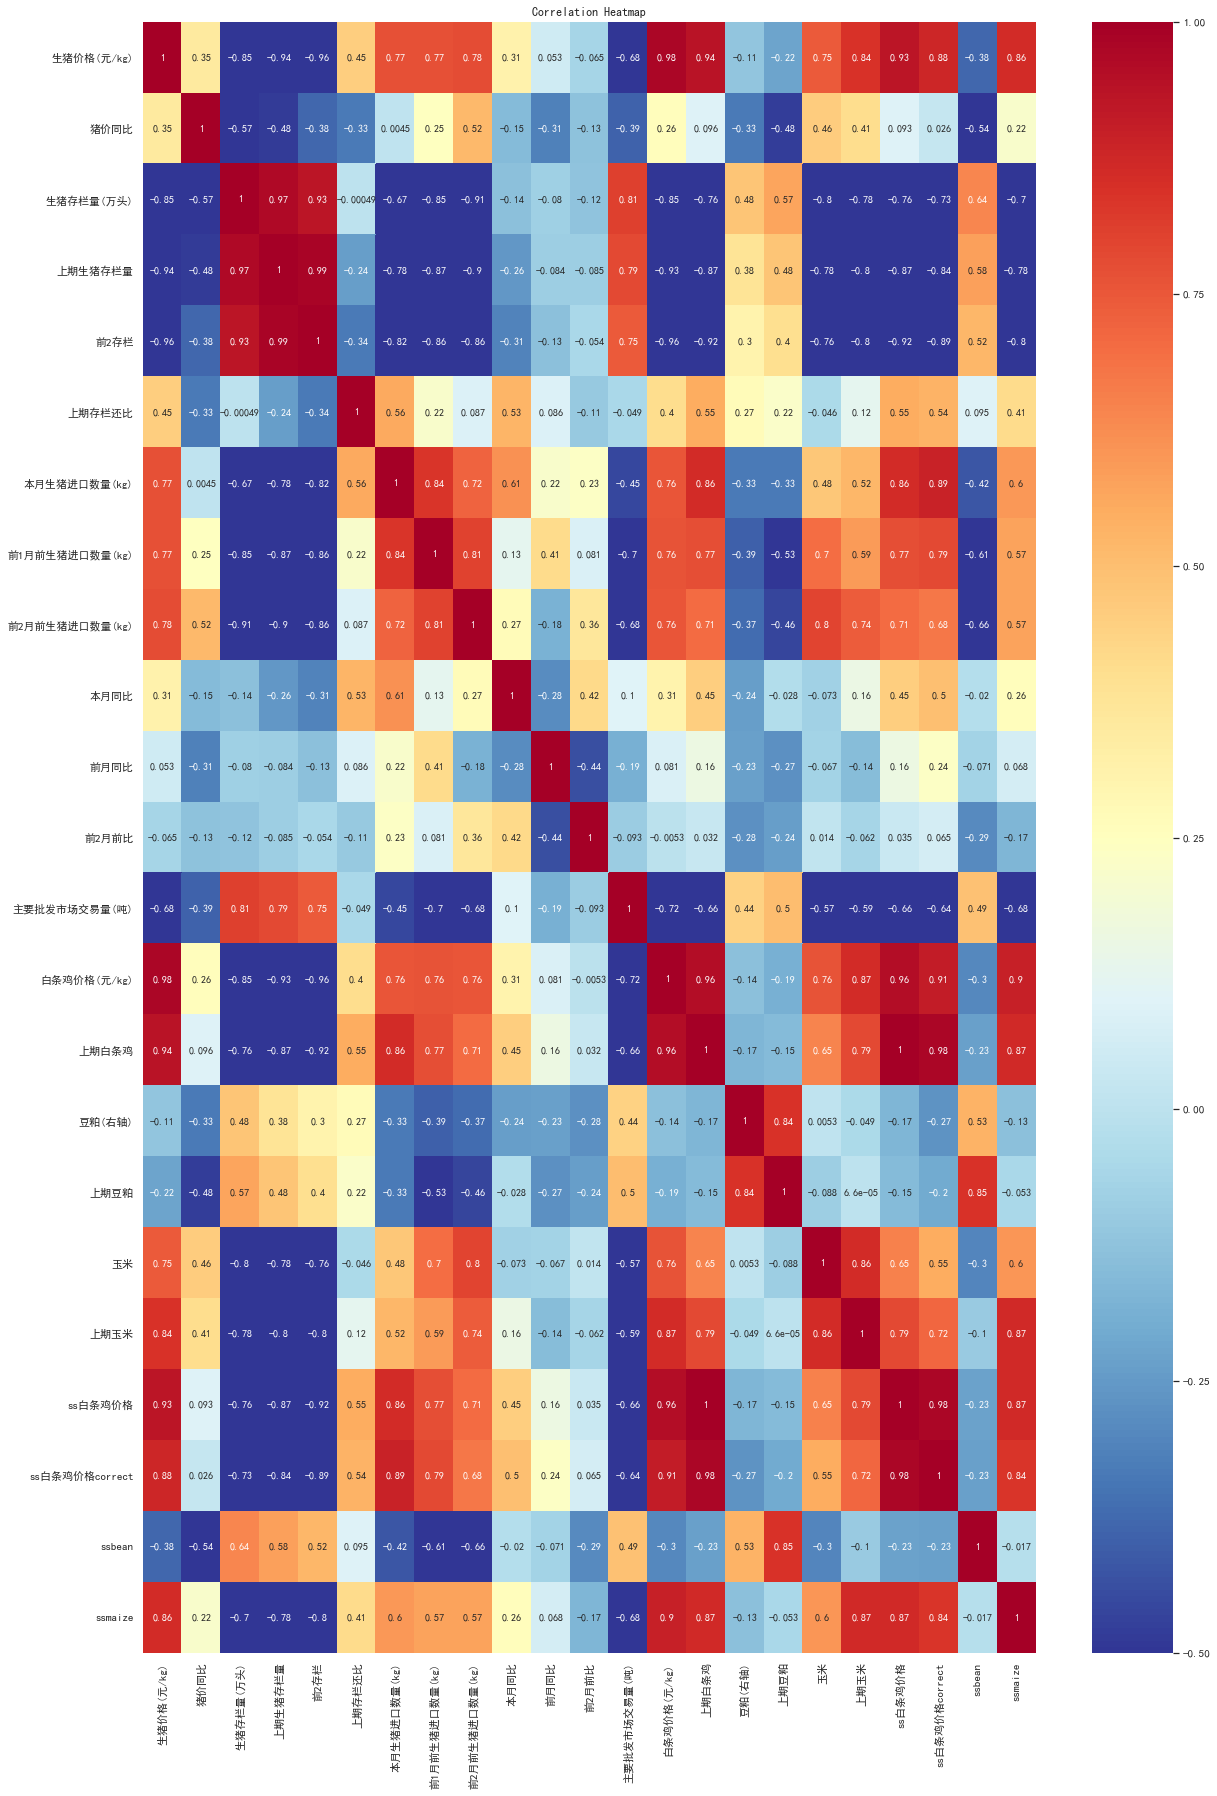

In [31]:
corr_c =correlation.corr(method = 'pearson', min_periods = 1)
heatMap(corr_c)

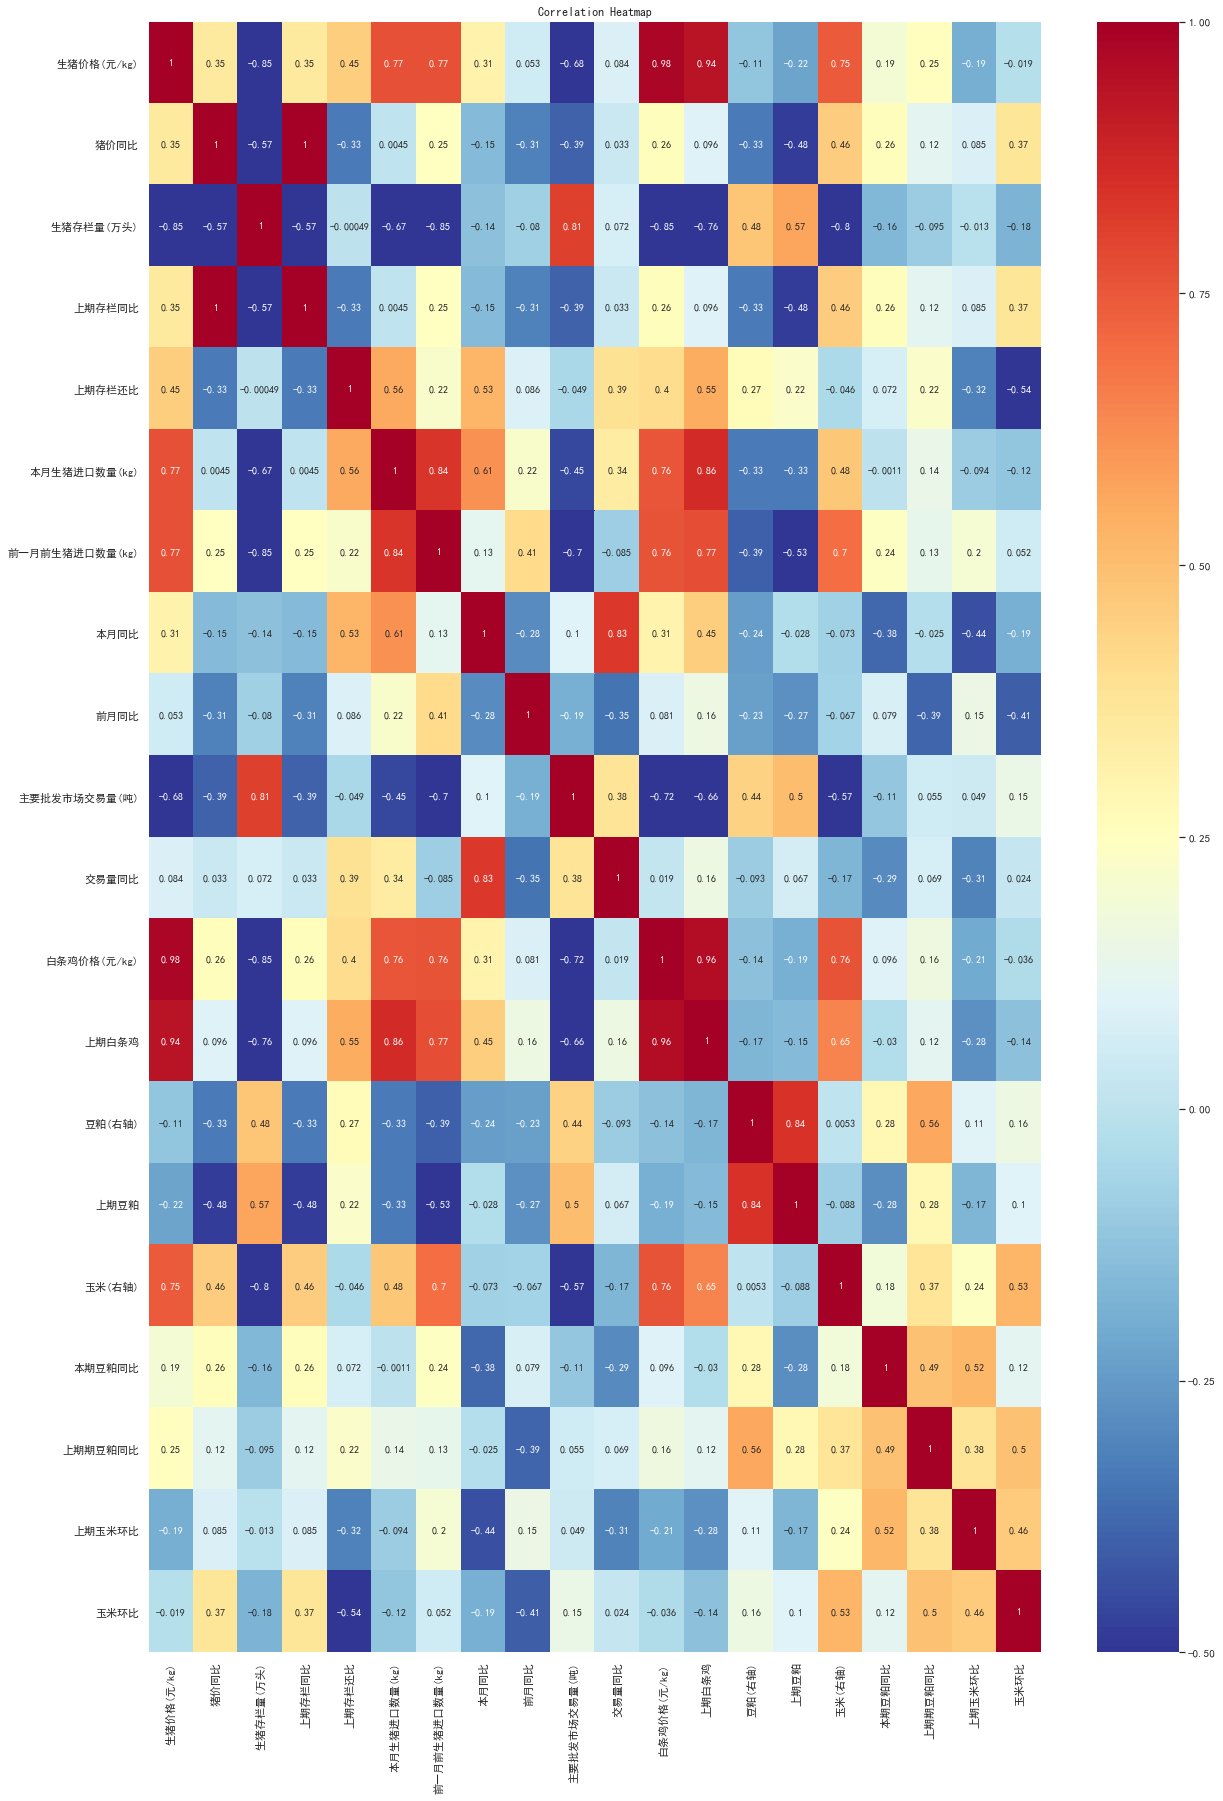

In [11]:
corr_produce_lag =produce_lag.corr(method = 'pearson', min_periods = 1)
heatMap(corr_produce_lag)

In [16]:
def get_variable_smooth(v):
    v_change = v.apply(lambda x: np.log(x) - np.log(x.shift(1)))['pigprice'].dropna()
    return v_change

In [4]:
# produce_lag = cover_date_to_dateIndex(produce_lag)
produce_lag

NameError: name 'produce_lag' is not defined

In [43]:
a = produce_lag.apply(lambda x: np.log(x) - np.log(x.shift(1)))['pigprice'].dropna()
b = produce_lag.apply(lambda x: np.log(x) - np.log(x.shift(1)))['三月前进口'].dropna()
c = produce_lag.apply(lambda x: np.log(x/x.shift(1)))['上月生猪存栏同比'].dropna()
d = produce_lag.apply(lambda x: np.log(x/x.shift(1)))['上月能繁母猪存栏同比'].dropna()
e = produce_lag.apply(lambda x: np.log(x) - np.log(x.shift(1)))['白条鸡'].dropna()
f = produce_lag.apply(lambda x: np.log(x) - np.log(x.shift(1)))['微博月均计数'].dropna()
g = produce_lag.apply(lambda x: np.log(x) - np.log(x.shift(1)))['bd_猪肉价格'].dropna()
h = produce_lag.apply(lambda x: np.log(x) - np.log(x.shift(1)))['bd_非洲猪瘟'].dropna()






C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\fyfse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in l

In [44]:
df = pd.concat([a,b,c,d,e,f,g,h], axis = 1)

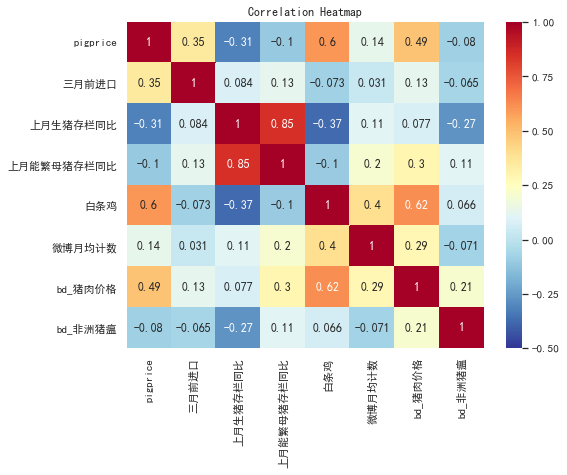

In [50]:
corr_df = df.corr(method = 'pearson', min_periods = 1)
heatMap(corr_df)

In [52]:
df.to_csv("monthly_smooth.csv", encoding = 'utf-8-sig', index = False)

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR

In [47]:
adfuller(a)

(-2.0045151846119817,
 0.28459686410782503,
 0,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 -14.019047646757787)

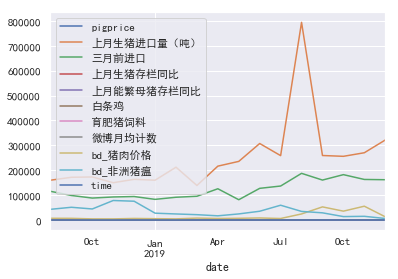

In [55]:
produce_lag.plot()

In [53]:
mod = VAR(df)
lag_order = mod.select_order()
print(lag_order.summary())

C:\Users\fyfse\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


LinAlgError: SVD did not converge in Linear Least Squares